**1. Can you think of a few applications for a sequence-to-sequence RNN? What about a sequence-to-vector RNN, and a vector-to-sequence RNN?**

**Answer:**
- **Sequence-to-sequence RNN:** This is used for tasks where both input and output are sequences, but not necessarily of the same length. Examples include:
  - Machine translation (translating a sentence in one language to another).
  - Text summarization (condensing a longer text into a shorter summary).
  - Speech recognition (converting spoken words into text).

- **Sequence-to-vector RNN:** This is used for tasks where the input is a sequence, but the output is a fixed-size vector. Examples include:
  - Sentiment analysis (taking a sequence of words and outputting a sentiment score).
  - Time series forecasting (inputting a sequence of past values to predict a single future value).
  - Anomaly detection in time series data.

- **Vector-to-sequence RNN:** This is used for tasks where the input is a fixed-size vector and the output is a sequence. Examples include:
  - Image captioning (inputting an image represented as a fixed-size vector and outputting a sequence of words describing it).
  - Music generation (starting with an initial seed and generating a sequence of notes).

**2. How many dimensions must the inputs of an RNN layer have? What does each dimension represent? What about its outputs?**

**Answer:** 
The inputs of an RNN layer typically have three dimensions: `(batch_size, time_steps, input_features)`.
- `batch_size` represents the number of samples in a batch.
- `time_steps` represents the sequence length.
- `input_features` represents the number of features at each time step.

The outputs of an RNN layer can be two-dimensional `(batch_size, output_features)` if `return_sequences=False` or three-dimensional `(batch_size, time_steps, output_features)` if `return_sequences=True`.

**3. If you want to build a deep sequence-to-sequence RNN, which RNN layers should have return_sequences=True? What about a sequence-to-vector RNN?**

**Answer:**
- For a deep sequence-to-sequence RNN, all intermediate RNN layers should have `return_sequences=True` to pass sequences to the next layer. The final layer can have either `True` or `False` based on specific requirements.
- For a sequence-to-vector RNN, only the final RNN layer should have `return_sequences=False`. All preceding layers should return sequences (`return_sequences=True`).

**4. Suppose you have a daily univariate time series, and you want to forecast the next seven days. Which RNN architecture should you use?**

**Answer:** 
You can use a sequence-to-sequence RNN architecture where the input sequence might represent the past 'N' days and the output sequence represents the forecasted values for the next seven days.

**5. What are the main difficulties when training RNNs? How can you handle them?**

**Answer:**
- **Vanishing and Exploding Gradients:** RNNs are prone to this issue due to the repeated multiplication of gradients through time. Solutions include gradient clipping, using LSTM or GRU cells, and careful initialization.
  
- **Long-term Dependencies:** Traditional RNNs struggle to carry information across long sequences. LSTMs and GRUs are designed to mitigate this issue by maintaining long-term dependencies.
  
- **Overfitting:** Like other neural networks, RNNs can overfit, especially when they have a large number of parameters. Regularization techniques like dropout can help.
  
- **Computational Complexity:** Training RNNs, especially deep ones, can be computationally expensive. This can be addressed by using efficient hardware, parallelizing operations, or using simpler architectures.

**6. Can you sketch the LSTM cell’s architecture?**

**Answer:** 
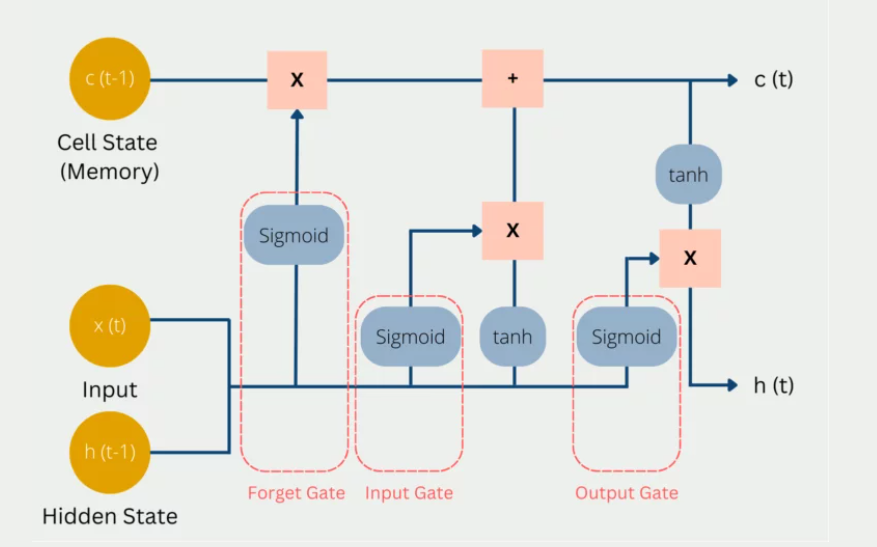

- It contains three gates: the forget gate, the input gate, and the output gate.
- The cell has an internal state 'c' and an output state 'h'.
- The forget gate decides what information from the cell state to throw away.
- The input gate decides what new information to store in the cell state.
- The output gate decides what part of the cell state should be output.
  
Together, these components allow the LSTM to maintain, update, and output information from its memory.

**7. Why would you want to use 1D convolutional layers in an RNN?**

**Answer:** 
1D convolutional layers can be used before feeding sequences into an RNN for several reasons:
- **Feature extraction:** Convolutional layers can detect local patterns in a sequence, which might be beneficial for the RNN.
- **Speed and Efficiency:** Conv1D can reduce the length of sequences by applying pooling layers, making RNN training faster.
- **Handling Longer Dependencies:** Convolutional layers can help the RNN capture longer-term dependencies without relying solely on recurrent layers.

**8. Which neural network architecture could you use to classify videos?**

**Answer:** 
To classify videos, you can use a combination of 3D Convolutional Neural Networks (3D CNNs) and RNNs. The 3D CNN can extract spatial and temporal features from video frames, while the RNN can capture temporal dependencies between the frames. Another approach is to use 2D CNNs frame by frame and then feed the sequence of extracted features into an RNN or Transformer for classification.

### 9. Train a classification model for the SketchRNN dataset, available in TensorFlow Datasets.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
DOWNLOAD_ROOT =  "http://download.tensorflow.org/data/"
FILENAME = "quickdraw_tutorial_dataset_v1.tar.gz"
filepath = keras.utils.get_file(FILENAME,
                                DOWNLOAD_ROOT + FILENAME,
                                cache_subdir="datasets/quickdraw",
                                extract=True)

1065304064/1065301781 [==============================] - 12s 0us/step


In [ ]:
quickdraw_dir = Path(filepath).parent
train_files = sorted([str(path) for path in quickdraw_dir.glob("training.tfrecord-*")])
eval_files = sorted([str(path) for path in quickdraw_dir.glob("eval.tfrecord-*")])

In [ ]:
train_files

['/root/.keras/datasets/quickdraw/training.tfrecord-00000-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00001-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00002-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00003-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00004-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00005-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00006-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00007-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00008-of-00010',
 '/root/.keras/datasets/quickdraw/training.tfrecord-00009-of-00010']

In [ ]:
with open(quickdraw_dir / "eval.tfrecord.classes") as test_classes_file:
    test_classes = test_classes_file.readlines()

with open(quickdraw_dir / "training.tfrecord.classes") as train_classes_file:
    train_classes = train_classes_file.readlines()



In [ ]:
assert train_classes == test_classes
class_names = [name.strip().lower() for name in train_classes]

In [ ]:
sorted(class_names)

['aircraft carrier',
 'airplane',
 'alarm clock',
 'ambulance',
 'angel',
 'animal migration',
 'ant',
 'anvil',
 'apple',
 'arm',
 'asparagus',
 'axe',
 'backpack',
 'banana',
 'bandage',
 'barn',
 'baseball',
 'baseball bat',
 'basket',
 'basketball',
 'bat',
 'bathtub',
 'beach',
 'bear',
 'beard',
 'bed',
 'bee',
 'belt',
 'bench',
 'bicycle',
 'binoculars',
 'bird',
 'birthday cake',
 'blackberry',
 'blueberry',
 'book',
 'boomerang',
 'bottlecap',
 'bowtie',
 'bracelet',
 'brain',
 'bread',
 'bridge',
 'broccoli',
 'broom',
 'bucket',
 'bulldozer',
 'bus',
 'bush',
 'butterfly',
 'cactus',
 'cake',
 'calculator',
 'calendar',
 'camel',
 'camera',
 'camouflage',
 'campfire',
 'candle',
 'cannon',
 'canoe',
 'car',
 'carrot',
 'castle',
 'cat',
 'ceiling fan',
 'cell phone',
 'cello',
 'chair',
 'chandelier',
 'church',
 'circle',
 'clarinet',
 'clock',
 'cloud',
 'coffee cup',
 'compass',
 'computer',
 'cookie',
 'cooler',
 'couch',
 'cow',
 'crab',
 'crayon',
 'crocodile',
 'crow

In [ ]:
def parse(data_batch):
    feature_descriptions = {
        "ink": tf.io.VarLenFeature(dtype=tf.float32),
        "shape": tf.io.FixedLenFeature([2], dtype=tf.int64),
        "class_index": tf.io.FixedLenFeature([1], dtype=tf.int64)
    }
    examples = tf.io.parse_example(data_batch, feature_descriptions)
    flat_sketches = tf.sparse.to_dense(examples["ink"])
    sketches = tf.reshape(flat_sketches, shape=[tf.size(data_batch), -1, 3])
    lengths = examples["shape"][:, 0]
    labels = examples["class_index"][:, 0]
    return sketches, lengths, labels

In [ ]:
def quickdraw_dataset(filepaths, batch_size=32, shuffle_buffer_size=None,
                      n_parse_threads=5, n_read_threads=5, cache=False):
    dataset = tf.data.TFRecordDataset(filepaths,
                                      num_parallel_reads=n_read_threads)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(parse, num_parallel_calls=n_parse_threads)
    return dataset.prefetch(1)

In [ ]:
train_set = quickdraw_dataset(train_files, shuffle_buffer_size=10000)
valid_set = quickdraw_dataset(eval_files[:5])
test_set = quickdraw_dataset(eval_files[5:])

In [ ]:
for sketches, lengths, labels in train_set.take(1):
    print("sketches =", sketches)
    print("lengths =", lengths)
    print("labels =", labels)

sketches = tf.Tensor(
[[[ 0.         -0.01694916  0.        ]
  [-0.03543308 -0.04661017  0.        ]
  [-0.03937006 -0.00847457  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.69411767  0.04705882  1.        ]
  [ 0.27843136  0.01176471  0.        ]
  [ 0.02745098  0.01176471  1.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 [[ 0.12252964  0.1         0.        ]
  [ 0.25296444  0.          0.        ]
  [ 0.1778656   0.08571429  0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ...

 [[-0.01593626  0.22745097  0.        ]
  [-0.04780877  0.19607842  1.        ]
  [ 0.05179283 -0.4078431   0.        ]
  ...
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.    

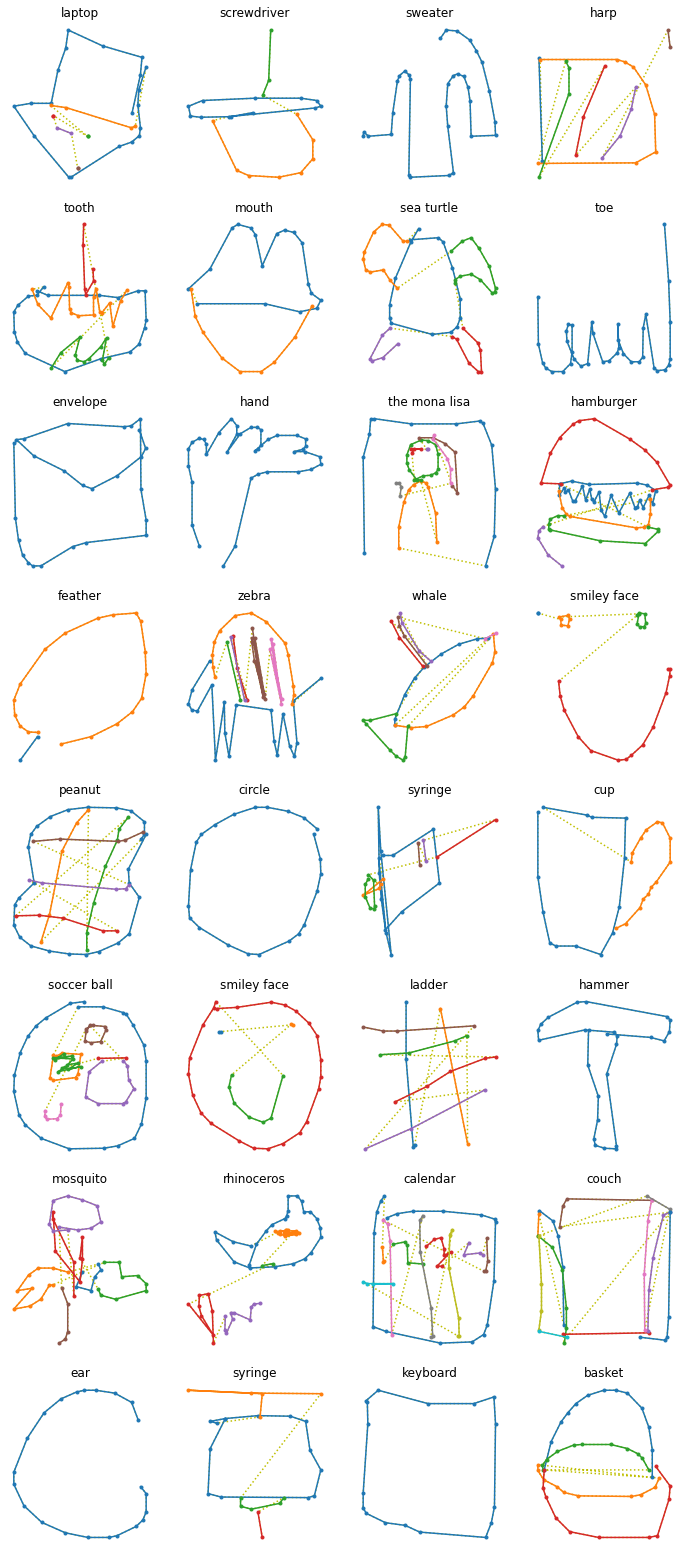

In [ ]:
def draw_sketch(sketch, label=None):
    origin = np.array([[0., 0., 0.]])
    sketch = np.r_[origin, sketch]
    stroke_end_indices = np.argwhere(sketch[:, -1]==1.)[:, 0]
    coordinates = np.cumsum(sketch[:, :2], axis=0)
    strokes = np.split(coordinates, stroke_end_indices + 1)
    title = class_names[label.numpy()] if label is not None else "Try to guess"
    plt.title(title)
    plt.plot(coordinates[:, 0], -coordinates[:, 1], "y:")
    for stroke in strokes:
        plt.plot(stroke[:, 0], -stroke[:, 1], ".-")
    plt.axis("off")

def draw_sketches(sketches, lengths, labels):
    n_sketches = len(sketches)
    n_cols = 4
    n_rows = (n_sketches - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 3, n_rows * 3.5))
    for index, sketch, length, label in zip(range(n_sketches), sketches, lengths, labels):
        plt.subplot(n_rows, n_cols, index + 1)
        draw_sketch(sketch[:length], label)
    plt.show()

for sketches, lengths, labels in train_set.take(1):
    draw_sketches(sketches, lengths, labels)

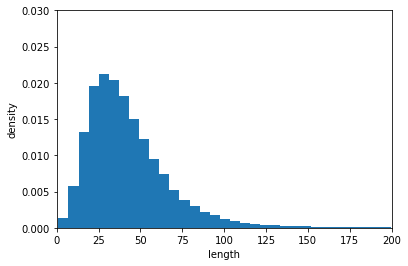

In [ ]:
lengths = np.concatenate([lengths for _, lengths, _ in train_set.take(1000)])
plt.hist(lengths, bins=150, density=True)
plt.axis([0, 200, 0, 0.03])
plt.xlabel("length")
plt.ylabel("density")
plt.show()

In [ ]:
def crop_long_sketches(dataset, max_length=100):
    return dataset.map(lambda inks, lengths, labels: (inks[:, :max_length], labels))

cropped_train_set = crop_long_sketches(train_set)
cropped_valid_set = crop_long_sketches(valid_set)
cropped_test_set = crop_long_sketches(test_set)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv1D(32, kernel_size=5, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(64, kernel_size=5, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv1D(128, kernel_size=3, strides=2, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(len(class_names), activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=1e-2, clipnorm=1.)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy", "sparse_top_k_categorical_accuracy"])
history = model.fit(cropped_train_set, epochs=2,
                    validation_data=cropped_valid_set)

Epoch 1/2
107813/107813 [==============================] - 1187s 11ms/step - loss: 4.8381 - accuracy: 0.0815 - sparse_top_k_categorical_accuracy: 0.2089 - val_loss: 3.0576 - val_accuracy: 0.3141 - val_sparse_top_k_categorical_accuracy: 0.6000
Epoch 2/2
107813/107813 [==============================] - 1185s 11ms/step - loss: 2.8533 - accuracy: 0.3519 - sparse_top_k_categorical_accuracy: 0.6409 - val_loss: 2.4578 - val_accuracy: 0.4251 - val_sparse_top_k_categorical_accuracy: 0.7136


In [ ]:
y_test = np.concatenate([labels for _, _, labels in test_set])
y_probas = model.predict(test_set)

In [ ]:
np.mean(keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_probas))

0.60615087

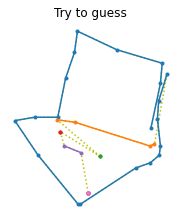

Top-5 predictions:
  1. laptop 15.919%
  2. barn 8.805%
  3. computer 5.801%
  4. telephone 4.379%
  5. piano 4.091%
Answer: laptop


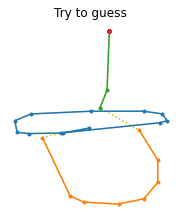

Top-5 predictions:
  1. wine glass 28.552%
  2. floor lamp 11.441%
  3. ice cream 6.650%
  4. sailboat 6.261%
  5. shovel 3.001%
Answer: screwdriver


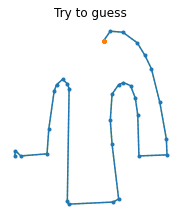

Top-5 predictions:
  1. sweater 38.199%
  2. jacket 26.473%
  3. castle 10.819%
  4. t-shirt 5.631%
  5. fence 2.030%
Answer: sweater


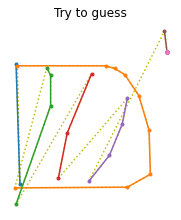

Top-5 predictions:
  1. harp 14.362%
  2. calendar 9.963%
  3. dresser 5.576%
  4. jail 5.303%
  5. barn 5.103%
Answer: harp


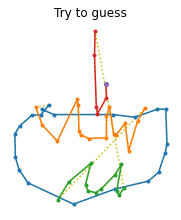

Top-5 predictions:
  1. hot tub 23.896%
  2. bathtub 13.206%
  3. cake 5.383%
  4. cruise ship 4.345%
  5. mouth 3.901%
Answer: tooth


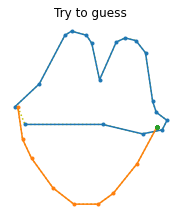

Top-5 predictions:
  1. mouth 88.641%
  2. hot dog 1.484%
  3. basket 1.357%
  4. sandwich 0.649%
  5. couch 0.477%
Answer: mouth


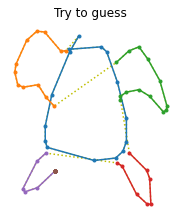

Top-5 predictions:
  1. penguin 39.135%
  2. sea turtle 7.777%
  3. elephant 6.851%
  4. owl 5.948%
  5. frog 5.210%
Answer: sea turtle


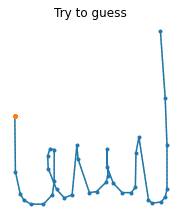

Top-5 predictions:
  1. giraffe 18.630%
  2. chandelier 13.080%
  3. saw 10.797%
  4. bat 4.592%
  5. rhinoceros 4.164%
Answer: toe


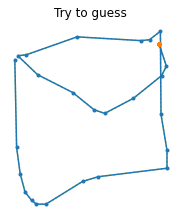

Top-5 predictions:
  1. envelope 30.245%
  2. picture frame 16.404%
  3. oven 9.048%
  4. dishwasher 7.483%
  5. cup 4.136%
Answer: envelope


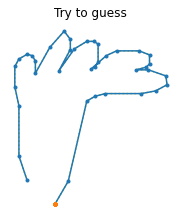

Top-5 predictions:
  1. hand 29.671%
  2. broccoli 14.067%
  3. tree 12.303%
  4. toe 6.279%
  5. bush 5.346%
Answer: hand


In [ ]:
n_new = 10
Y_probas = model.predict(sketches)
top_k = tf.nn.top_k(Y_probas, k=5)
for index in range(n_new):
    plt.figure(figsize=(3, 3.5))
    draw_sketch(sketches[index])
    plt.show()
    print("Top-5 predictions:".format(index + 1))
    for k in range(5):
        class_name = class_names[top_k.indices[index, k]]
        proba = 100 * top_k.values[index, k]
        print("  {}. {} {:.3f}%".format(k + 1, class_name, proba))
    print("Answer: {}".format(class_names[labels[index].numpy()]))